<a href="https://colab.research.google.com/github/Urstruelycharan/GUVI-DeepLearning/blob/master/MP_neuron_and_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#intro

In [0]:
!cat /proc/meminfo



MemTotal:       13335180 kB
MemFree:        10496360 kB
MemAvailable:   12484836 kB
Buffers:           72200 kB
Cached:          2068380 kB
SwapCached:            0 kB
Active:           725680 kB
Inactive:        1863068 kB
Active(anon):     422100 kB
Inactive(anon):      320 kB
Active(file):     303580 kB
Inactive(file):  1862748 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               240 kB
Writeback:             0 kB
AnonPages:        448144 kB
Mapped:           229132 kB
Shmem:               876 kB
Slab:             158964 kB
SReclaimable:     126428 kB
SUnreclaim:        32536 kB
KernelStack:        3600 kB
PageTables:         5728 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667588 kB
Committed_AS:    2849512 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
ShmemHugePages:  

#package






In [0]:
import numpy as np

#plotting


In [0]:
import matplotlib.pyplot as plt

In [0]:
x=np.random.random((10,1))
print(x)

[[0.61062234]
 [0.44956097]
 [0.19184621]
 [0.51885084]
 [0.02069913]
 [0.96292493]
 [0.84507191]
 [0.19662383]
 [0.43987458]
 [0.81186791]]


plt.plot(x,'*-')
plt.show()

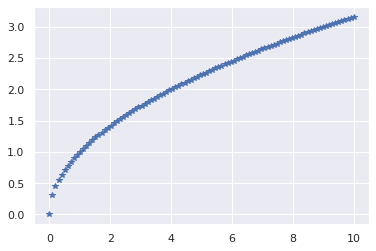

In [0]:
x=np.linspace(0,10,100)
y=np.power(x,0.5)
plt.plot(x,y,'*')
plt.show()

In [0]:
import seaborn as sns
sns.set()

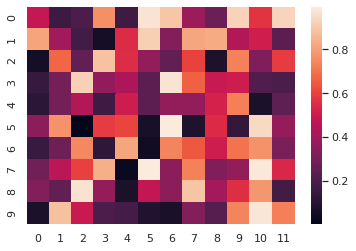

In [0]:
x=np.random.random((10,12))
ax=sns.heatmap(x)

In [0]:
!wget https://miro.medium.com/max/950/1*sUHVxRoPHoZpPi7XjmVkzg.png
!ls


--2020-03-28 05:55:41--  https://miro.medium.com/max/950/1*sUHVxRoPHoZpPi7XjmVkzg.png
Resolving miro.medium.com (miro.medium.com)... 104.16.118.145, 104.16.120.145, 104.16.117.145, ...
Connecting to miro.medium.com (miro.medium.com)|104.16.118.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39865 (39K) [image/png]
Saving to: ‘1*sUHVxRoPHoZpPi7XjmVkzg.png’

1*sUHVxRoPHoZpPi7Xj 100%[===================>]  38.93K  --.-KB/s    in 0.01s   

2020-03-28 05:55:42 (3.28 MB/s) - ‘1*sUHVxRoPHoZpPi7XjmVkzg.png’ saved [39865/39865]

'1*sUHVxRoPHoZpPi7XjmVkzg.png'	 sample_data


In [0]:
!mv 1*sUHVxRoPHoZpPi7XjmVkzg.png onefourthlabs1.png
!ls

onefourthlabs1.png  sample_data


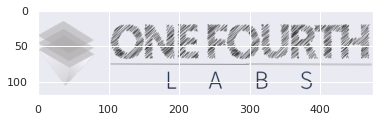

In [0]:
import matplotlib.image as mpimg
img=mpimg.imread('onefourthlabs1.png')
imgplot=plt.imshow(img)


#mpneuron-Loading data set



In [0]:
import sklearn.datasets
import numpy as np
import pandas as pd


In [0]:
breast_cancer=sklearn.datasets.load_breast_cancer()
x=breast_cancer.data
y=breast_cancer.target
data=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
data['class']=breast_cancer.target

In [0]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


#Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
x=data.drop('class',axis=1)
y=data['class']


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=1)
#print(y.shape,y_train.shape,y_test.shape)
#print(y.mean(),y_train.mean(),y_test.mean())
#type(y_train)
print(x_train)

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
430       14.900         22.53  ...          0.2866                  0.11550
48        12.050         14.63  ...          0.2747                  0.08301
105       13.110         15.56  ...          0.3147                  0.14050
467        9.668         18.10  ...          0.3057                  0.07875
547       10.260         16.58  ...          0.2691                  0.09479
..           ...           ...  ...             ...                      ...
201       17.540         19.32  ...          0.2928                  0.07867
183       11.410         14.92  ...          0.1811                  0.07427
285       12.580         18.40  ...          0.2505                  0.06431
49        13.490         22.30  ...          0.2871                  0.06917
161       19.190         15.94  ...          0.2443                  0.06251

[512 rows x 30 columns]


#binarization of input

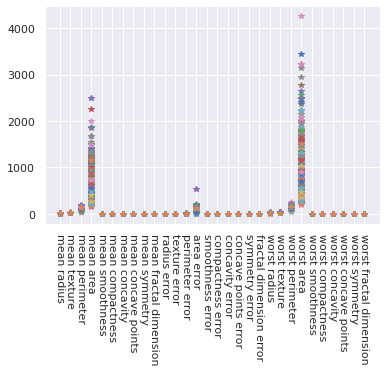

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.plot(x_train.T,'*')
plt.xticks(rotation=270)
plt.show()


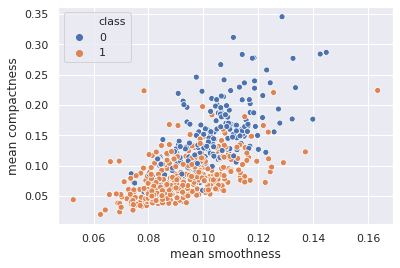

In [0]:
ax=sns.scatterplot(x='mean smoothness',y='mean compactness',hue='class',data=data)

In [0]:
x_binarized_train=x_train.apply(pd.cut,bins=2,labels=[1,0])
#y_binarized_train=y_train.apply(pd.cut,bins=2,labels=[0,1])
x_binarized_test=x_test.apply(pd.cut,bins=2,labels=[1,0])
#y_binarized_test=y_test.apply(pd.cut,bins=2,labels=[0,1])
type(x_train)


pandas.core.frame.DataFrame

In [0]:
x_binarized_test=x_binarized_test.values
x_binarized_train=x_binarized_train.values
print(x_binarized_test)

[[1 1 1 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 0 1]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]]


#mp_neuron-model

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
for b in range(x_binarized_train.shape[1]+1):
  y_pre_train=[]
  accurate_rows=0
  accuracy_list={}
  for x,y in zip(x_binarized_train,y_train):
    y_pred=(np.sum(x)>=b)
    y_pre_train.append(y_pred)
    accurate_rows += (y==y_pred)
  accuracy=accurate_rows/x_binarized_train.shape[0]
  accuracy_list[b]=accuracy
  
  print(b,accuracy)
  
#arr=np.array(accuracy_list)
print(accuracy_list.items())

0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625
dict_items([(30, 0.759765625)])


In [0]:
from sklearn.metrics import accuracy_score
b=28
y_pred_test=[]
for x in x_binarized_test:
  y_pred=(np.sum(x)>=b)
  y_pred_test.append(y_pred)
accuracy=accuracy_score(y_pred_test,y_test)
print(b,accuracy)

28 0.7894736842105263


#mp neuron class

In [0]:
class MPNeuron:
  def __init__(self):
    self.b=None
  def model(self,X):
    return(np.sum(X)>=self.b)
  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)
  def fit(self,X,Y):
    accuracy={}
    for b in range(X.shape[1]+1):
      self.b=b
      y_pred=self.predict(X)
      accuracy[b]=accuracy_score(y_pred,y_train)
    best_b=max(accuracy,key=accuracy.get)
    print('optimal value of b is ',best_b)
    self.b=best_b
    print('Highest accuracy is ',accuracy[best_b])

In [0]:
mp_neuron=MPNeuron()
mp_neuron.fit(x_binarized_train,y_train)

optimal value of b is  28
Highest accuracy is  0.849609375


In [0]:
y_p=mp_neuron.predict(x_binarized_test)
accuracy=accuracy_score(y_p,y_test)
print(accuracy)

0.7894736842105263


#perceptron class

In [0]:
class Perceptron:
  def __init__(self):
    self.w=None
    self.b=None

  def model(self,X):
    return 1 if (np.dot(self.w,X)>=self.b) else 0

  def predict(self,X):
    y=[]
    for x in X:
      result=self.model(x)
      y.append(result)
    return np.array(y)

  def fit(self,X,Y,epochs=2,lr=1):
    self.w=np.ones(X.shape[1])
    self.b=0
    acuracy={}
    max_accuracy=0
    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred=self.model(x)
        if y == 1 and y_pred==0:
          self.w=self.w+lr*x
          self.b=self.b+lr*1
        elif y==0 and y_pred==1:
          self.w=self.w-lr*x
          self.b=self.b-lr*1
      y_result=self.predict(X)
      acuracy[i]=accuracy_score(y_result,Y)
      if acuracy[i]>max_accuracy:
        max_accuracy=acuracy[i]
        chkptw=self.w
        chkptb=b
    array=np.array(list(acuracy.values()))
    print(max_accuracy)
    self.w=chkptw
    self.b=chkptb
    plt.plot(array)
    plt.ylim(0,1)
    plt.show()
    

    #print("The optial value of w is",self.w)
    #print('the optimal value of b is',self.b)



In [0]:
x_train=x_train.values
x_test=x_test.values

#as perceptron accepts even numerical data not only binary data.so no need to cut data into binarized form

In [0]:
percp=Perceptron()

0.873046875


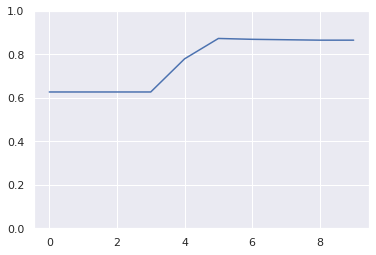

In [0]:
percp.fit(x_train,y_train,10,0.000001)

In [0]:
y_pred_test=percp.predict(x_train)
print(accuracy_score(y_pred_test,y_train))


0.810546875
